In [130]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions.plot_gradient import *
from functions_old.multi_gradient_descent import *
from math import log

In [131]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    m = x.shape[0]
    for i in range(x.shape[0]):
        if y[i] ==1:
            k -= (1/m)*np.log(fun(x[i],w,b))
        if y[i] ==0:
            k -= (1/m)*(np.log(1-fun(x[i],w,b)))
    return k
def compute_gradient(x,y,w,b):
    lambda_ = 1
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for refualrization
    for j in range(x.shape[1]):
        dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y,alpha = 0.01,iter =10000 ):
    hist = []
    w = np.zeros(x.shape[1])
    b =0
    for i in range(iter):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        k  =cost(x,y,w,b)
        hist.append([i,k])
        if i%100 ==0:
            # print(w,b,"-------------------------------- cost: ",cost(x,y,w,b))
            print("itreation: ",i,"-------------------------------- cost: ",k)
            pass
    return w,b,hist





In [132]:
def map_feature(X1, X2,degree=6):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    # degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [133]:
data = np.loadtxt("C:\code\ml\Coursera\material\C1 - Supervised Machine Learning - Regression and Classification\week3\C1W3A1\data\ex2data1.txt",delimiter = ',')
x_train = data[:,:2]
y_train = data[:,2]
# x_train = np.array([[x,y,x**2,y**2] for x,y in list(x_train)])
# x_train = np.c_[x_train[:,0],x_train[:,1],x_train[:,0]**2,x_train[:,1]**2,x_train[:,0]**3,x_train[:,1]**3]
x_train = map_feature(x_train[:,0],x_train[:,1])
print(x_train)
# y_train

[[3.46236596e+01 7.80246928e+01 1.19879781e+03 ... 4.44297848e+10
  1.00122874e+11 2.25627694e+11]
 [3.02867108e+01 4.38949975e+01 9.17284849e+02 ... 3.40537024e+09
  4.93545566e+09 7.15303209e+09]
 [3.58474088e+01 7.29021980e+01 1.28503672e+03 ... 3.62976097e+10
  7.38177632e+10 1.50121791e+11]
 ...
 [9.93150088e+01 6.87754095e+01 9.86347097e+03 ... 2.20679764e+11
  1.52820216e+11 1.05827639e+11]
 [5.53400176e+01 6.49319380e+01 3.06251754e+03 ... 5.44392391e+10
  6.38750303e+10 7.49462991e+10]
 [7.47758930e+01 8.95298129e+01 5.59143417e+03 ... 3.59247640e+11
  4.30130256e+11 5.14998615e+11]]


array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

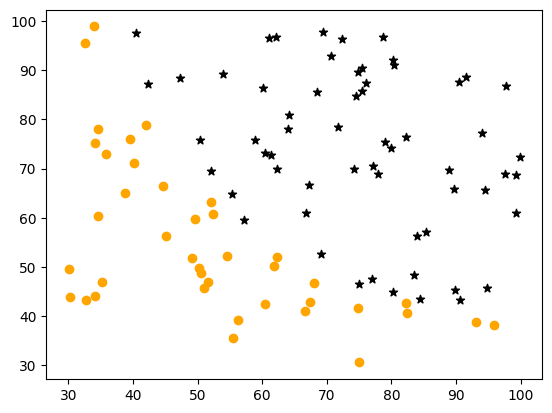

In [134]:
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        pl.scatter(x_train[i,0], x_train[i,1],marker='*',color='black')
    else:
        pl.scatter(x_train[i,0], x_train[i,1],marker='o',color= 'orange')
        
pl.show()

In [135]:

X = feature_scaling(x_train)
# y_train = feature_scaling(y_train)

In [136]:
per_w,per_b,hist = logistic_descent(X,y_train,10,2500)
hist = np.array(hist)
print(per_w,per_b)

itreation:  0 -------------------------------- cost:  0.699981054120894
itreation:  100 -------------------------------- cost:  0.34918940751177807
itreation:  200 -------------------------------- cost:  0.3086902908185842
itreation:  300 -------------------------------- cost:  0.290906027758971
itreation:  400 -------------------------------- cost:  0.28060760001571783
itreation:  500 -------------------------------- cost:  0.2737896137800629
itreation:  600 -------------------------------- cost:  0.26891351972664324
itreation:  700 -------------------------------- cost:  0.2652516188734057
itreation:  800 -------------------------------- cost:  0.2624091515829222
itreation:  900 -------------------------------- cost:  0.26015008194339306
itreation:  1000 -------------------------------- cost:  0.2583228410053138
itreation:  1100 -------------------------------- cost:  0.2568247630084162
itreation:  1200 -------------------------------- cost:  0.25558340846430555
itreation:  1300 ----

In [137]:
# good values at cost 0.28
# [  0.39664464   5.37172645  -4.10272205  -5.69348236  -1.19712926
#    7.11766681  12.47982926  21.72942956   5.11933198  -0.42590879
#   -3.87492642   5.2134271   -6.1019243  -22.82453656   1.98800004
#   -4.80822942   6.55607643  -0.8712463  -21.65766905   9.27194633
#  -34.28011989  -7.86397389  -4.56595912   7.29856087 -27.41739458
#  -28.04650768  -5.14905925] -1.9859311381516982

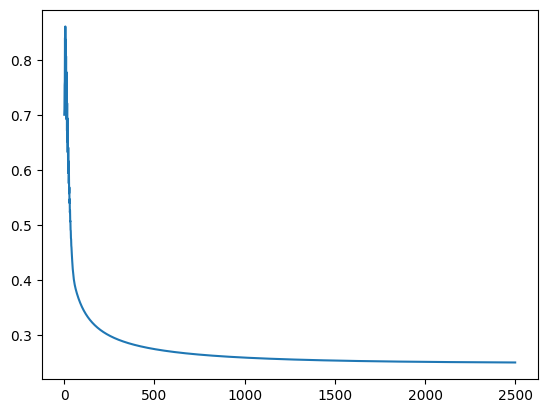

In [138]:
pl.plot(hist[:,0],hist[:,1])
pl.show()

In [139]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        for j in range(n): 
            z_wb += 0
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = 1 if f_wb>0.5 else 0
        
    return p

In [140]:
pred = predict(X,per_w,per_b)
print('Train Accuracy: %f'%(np.mean(pred == y_train) * 100))

Train Accuracy: 90.000000


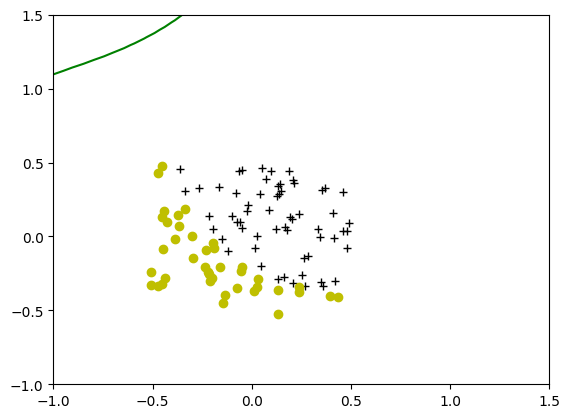

In [143]:
plot_decision_boundary(per_w,per_b,X,y_train)

In [144]:
# for i in range(y_train.shape[0]):
#     if y_train[i] == 1:
#         pl.scatter(x_train[i,0], x_train[i,1],marker='*',color='black')
#     else:
#         pl.scatter(x_train[i,0], x_train[i,1],marker='o',color= 'orange')
        

# x1 = np.linspace(-1, 1.5, 50)
# x2 = np.linspace(-1, 1.5, 50)
# for i in range(x1.shape[0]):
#     for j in range(x2.shape[0]):
#         k = np.dot(map_feature(x1[i],x2[j])[0],per_w) +per_b
#         if int(k) == 0:
#             print(k)
#             pl.scatter(x1[i],x2[j],color='blue')
# pl.show()